<div style="background-color: #FFFFFF;">
    <div style="color:#0000FF; font-size:18px; font-weight: bold;">Librer&iacute;as que deben instalarse previamente:</div>
    <div style="font-family: 'Lucida Console'; background-color: #455A64; color: #ffffff;">
    [python_path]$ python -m pip install --upgrade pip<br>
    [python_path]$ python -m pip install numpy<br>
    [python_path]$ python -m pip install scikit-image<br>
    [python_path]$ python -m pip install pillow<br>
    [python_path]$ python -m pip install matplotlib
    </div>
</div>

<span style="color:#0000FF; font-size:18px; font-weight: bold;">1. Se importan las librerías necesarias:</span>

In [1]:
import csv
import numpy as np
from sklearn import svm
from sklearn import metrics
import afssa
import matplotlib.pyplot as plt

<span style="color:#0000FF; font-size:18px; font-weight: bold;">2. Se define el directorio donde se encuentran los datasets y se cargan en memoria:</span>

In [2]:
datadir             = './DatasetECE2024/'

training_data       = np.genfromtxt(datadir + '01_Training.csv', delimiter=',', skip_header=1)
training_classes    = np.genfromtxt(datadir + '01_TrainingClasses.txt')

validation_data     = np.genfromtxt(datadir + '02_Validation.csv', delimiter=',', skip_header=1)
validation_classes  = np.genfromtxt(datadir + '02_ValidationClasses.txt')

training_data       = training_data   / training_data.max(axis=0)
validation_data     = validation_data / validation_data.max(axis=0)

<span style="color:#0000FF; font-size:18px; font-weight: bold;">3. Se cargan los nombres de las caracteristicas para saber al final, cu&aacute;les se seleccionan:</span>

In [3]:
lista_caracteristicas = []
with open(datadir + '01_Training.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter = ',')
    for row in csv_reader:
        lista_caracteristicas.append(row)
        break

<span style="color:#0000FF; font-size:18px; font-weight: bold;">4. Se configuran los par&aacute;metros del Recocido Simulado:</span>

In [4]:
# Se definen las iteraciones maximas del SA:
max_iters = 2000

#Se genera una solucion inicial de forma
sol_ini = np.random.randint(low=0, high=2, size=(training_data.shape[1]), dtype=int) >= 0

<span style="color:#0000FF; font-size:18px; font-weight: bold;">5. Se realiza la Selecci&oacute;n Autom&aacute;tica de caracter&iacute;sticas:</span>

In [5]:
best_sol,   best_effclass, best_effeat, \
best_effmo, best_model,    perf_data = afssa.search(training_data,
                                                    training_classes,
                                                    validation_data,
                                                    validation_classes,
                                                    max_iters,
                                                    sol_ini)

Running Iteration 1 of 2000  EffClass: 0.750000, Effeat: 0.000000 [23 Features], EffMO: 0.712500
Running Iteration 2 of 2000  EffClass: 0.550000, Effeat: 0.391304 [14 Features], EffMO: 0.542065
Running Iteration 3 of 2000  EffClass: 0.750000, Effeat: 0.739130 [6 Features], EffMO: 0.749457
Running Iteration 4 of 2000  EffClass: 0.600000, Effeat: 0.565217 [10 Features], EffMO: 0.598261
Running Iteration 5 of 2000  EffClass: 0.600000, Effeat: 0.652174 [8 Features], EffMO: 0.602609
Running Iteration 6 of 2000  EffClass: 0.600000, Effeat: 0.826087 [4 Features], EffMO: 0.611304
Running Iteration 7 of 2000  EffClass: 0.650000, Effeat: 0.652174 [8 Features], EffMO: 0.650109
Running Iteration 8 of 2000  EffClass: 0.700000, Effeat: 0.695652 [7 Features], EffMO: 0.699783
Running Iteration 9 of 2000  EffClass: 0.600000, Effeat: 0.434783 [13 Features], EffMO: 0.591739
Running Iteration 10 of 2000  EffClass: 0.650000, Effeat: 0.652174 [8 Features], EffMO: 0.650109
Running Iteration 11 of 2000  EffCl

<div>
    <p style="color:#0000FF; font-size:18px; font-weight: bold;">
        6. Se muestran los datos del mejor resultado obtenido:
    </p>
    <ul style="font-size:18px;">
        <li>Eficiencia de Clasificaci&oacute;n</li>
        <li>Porcentaje de discriminaci&oacute;n de aracter&iacute;sticas</li>
        <li>Eficiencia Multi-Objetivo</li>
        <li>Lista de Caracter&iacute;sticas Seleccionadas</li>
    </ul>
</div>

In [6]:
afssa.__print_performance__(best_effclass, best_effeat, best_effmo, best_sol, lista_caracteristicas, True)

EffClass: 0.800000, Effeat: 0.826087 [4 Features], EffMO: 0.801304
Caracteristicas Seleccionadas:
	Min
	Variance
	Variance
	SumEntropy


<p style="color:#0000FF; font-size:18px; font-weight: bold;">
7. Se entrena y prueba una M&aacute;quina de Soporte Vectorial (SVM) utilizando todas las caracter&iacute;sticas:
</p>

In [7]:
model = svm.SVC()
model.fit(training_data, training_classes)
preds = model.predict(validation_data)
accuracy = metrics.accuracy_score(validation_classes, preds)
print("Validation Accuracy With All Features: %f" %(accuracy))

Validation Accuracy With All Features: 0.750000


<p style="color:#0000FF; font-size:18px; font-weight: bold;">
8. Se entrena y prueba una M&aacute;quina de Soporte Vectorial (SVM) utilizando solo las caracter&iacute;sticas seleccionadas por el Recocido Simulado:
</p>

In [8]:
model = svm.SVC()
model.fit(training_data[:, best_sol], training_classes)
preds = model.predict(validation_data[:, best_sol])
accuracy = metrics.accuracy_score(validation_classes, preds)
print("Validation Accuracy With Selected Features: %f" %(accuracy))

Validation Accuracy With Selected Features: 0.800000


<div>
    <p style="color:#0000FF; font-size:18px; font-weight: bold;">
        9. Se generan 3 gr&aacute;ficas para visualizar el desempe&ntilde;o del algoritmo:
    </p>
    <ol style="padding-left: 48px; font-size:18px;">
        <li>Gr&aacute;fica del comportamiento del Fitness Multi-Objetivo</li>
        <li>Gr&aacute;fica del comportamiento de la Exactitud de la Clasificaci&oacute;n</li>
        <li>Gr&aacute;fica del comportamiento de la Discriminaci&oacute;n de caracter&iacute;sticas</li>
    </ol>
</div>

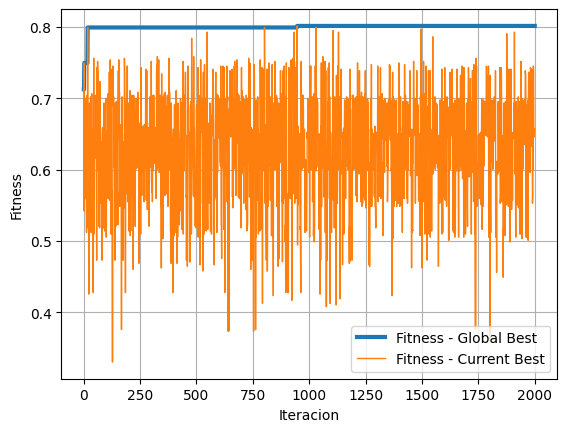

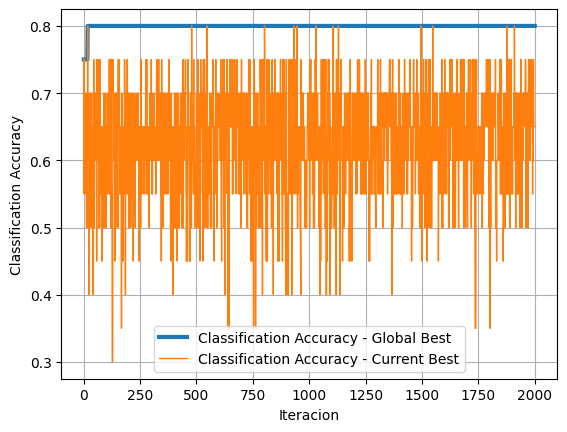

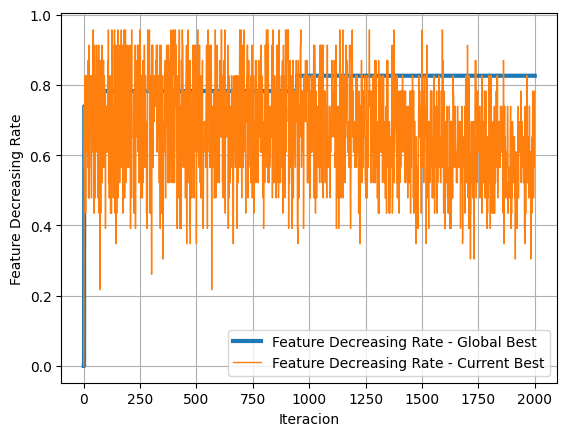

In [9]:
x_data = np.linspace(1, max_iters, max_iters)
fig, axs = plt.subplots()
axs.plot(x_data, perf_data[:, 0], label='Fitness - Global Best', linewidth=3)
axs.plot(x_data, perf_data[:, 1], label='Fitness - Current Best', linewidth=1, linestyle='-')
axs.set_xlabel('Iteracion')
axs.set_ylabel('Fitness')
axs.grid(True)
axs.legend()

fig, axs = plt.subplots()
axs.plot(x_data, perf_data[:, 2], label='Classification Accuracy - Global Best', linewidth=3)
axs.plot(x_data, perf_data[:, 3], label='Classification Accuracy - Current Best', linewidth=1, linestyle='-')
axs.set_xlabel('Iteracion')
axs.set_ylabel('Classification Accuracy')
axs.grid(True)
axs.legend()


fig, axs = plt.subplots()
axs.plot(x_data, perf_data[:, 4], label='Feature Decreasing Rate - Global Best', linewidth=3)
axs.plot(x_data, perf_data[:, 5], label='Feature Decreasing Rate - Current Best', linewidth=1, linestyle='-')
axs.set_xlabel('Iteracion')
axs.set_ylabel('Feature Decreasing Rate')
axs.grid(True)
axs.legend()

plt.show()